In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [2]:
crime=pd.read_csv("C:/Users/Yogendra/Downloads/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
def agg_clust(data, num_clusters, metric):
    cluster_model = AgglomerativeClustering(n_clusters=num_clusters,
                                            affinity=metric,
                                            linkage='average')
 
    clusters = cluster_model.fit_predict(data)
 
    score = silhouette_score(data,
                             cluster_model.labels_,
                             metric='euclidean')
    return clusters, score

In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
crime_norm = norm_func(crime.iloc[:,1:])

In [6]:
y_euclidean, euclidean_score = agg_clust(crime_norm, 4, 'euclidean')
y_l1, l1_score = agg_clust(crime_norm, 4, 'l1')
y_l2, l2_score = agg_clust(crime_norm, 4, 'l2')
y_manhattan, manhattan_score = agg_clust(crime_norm, 4, 'manhattan')
y_cosine, cosine_score = agg_clust(crime_norm, 4, 'cosine')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 

In [10]:
X = crime.iloc[:, [3, 4]].values

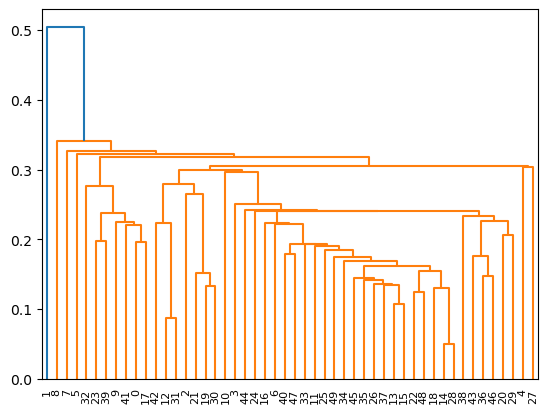

In [7]:
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='single'))

In [12]:
def plot_clusters(data, y, metric):
    plt.scatter(data[y==0, 0], data[y==0, 1],
                s=100, c='red',
                label ='Cluster 1')
    plt.scatter(data[y==1, 0], data[y==1, 1],
                s=100, c='blue',
                label ='Cluster 2')
    plt.scatter(data[y==2, 0], data[y==2, 1],
                s=100, c='green',
                label ='Cluster 3')
    plt.scatter(data[y==3, 0], data[y==3, 1],
                s=100, c='purple',
                label ='Cluster 4')
    plt.title(f'Clusters of Crimes (using {metric} distance metric)')
    plt.legend()
    plt.show()

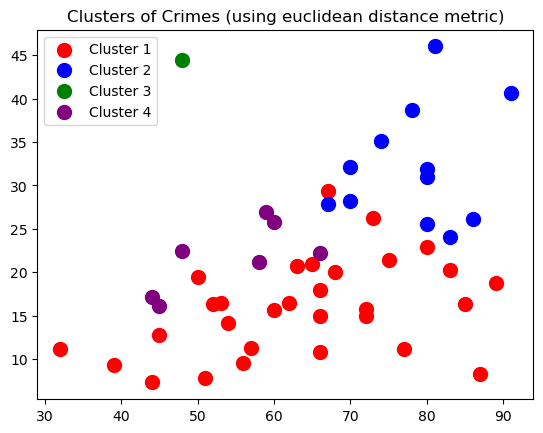

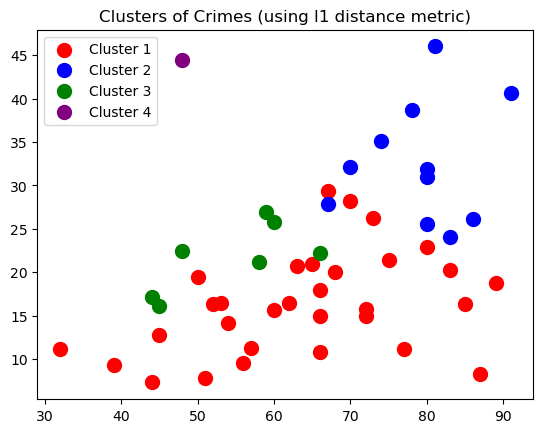

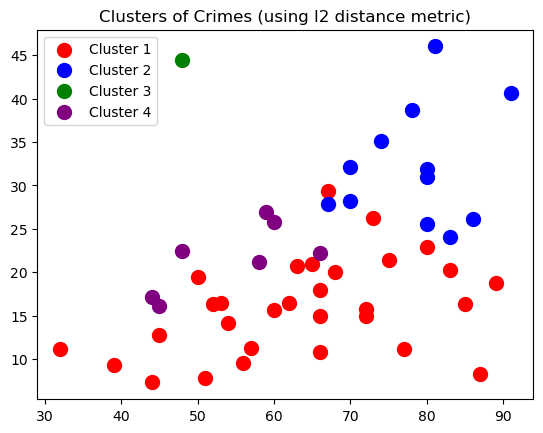

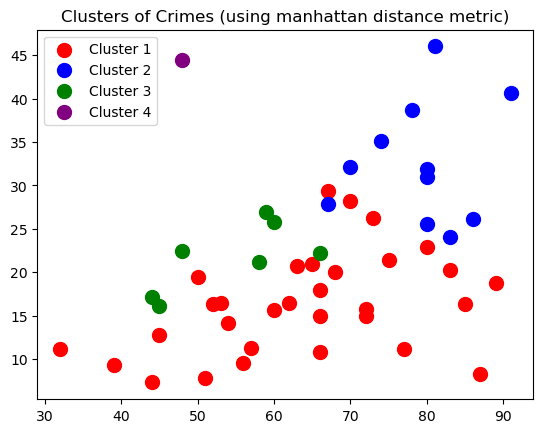

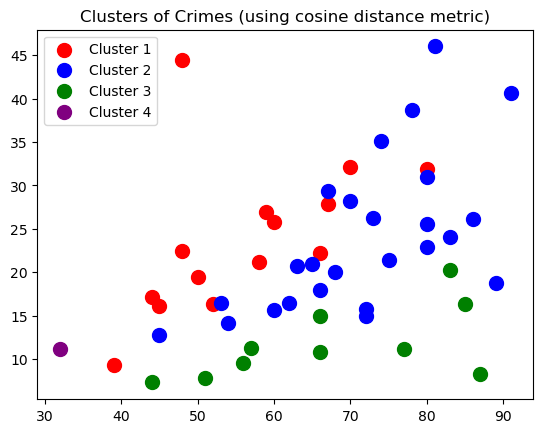

In [13]:
plot_clusters(X, y_euclidean, 'euclidean')
plot_clusters(X, y_l1, 'l1')
plot_clusters(X, y_l2, 'l2')
plot_clusters(X, y_manhattan, 'manhattan')
plot_clusters(X, y_cosine, 'cosine')

<BarContainer object of 5 artists>

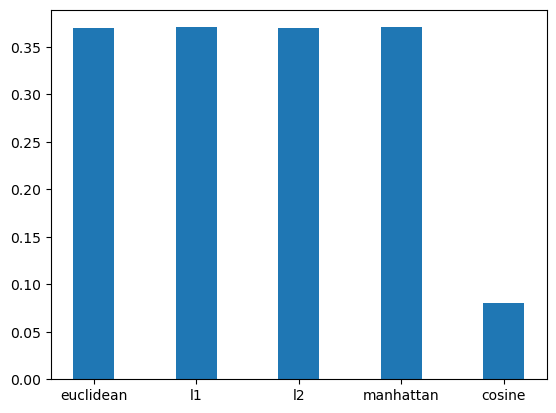

In [14]:
silhouette_scores = {'euclidean': euclidean_score,
                     'l1': l1_score,
                     'l2': l2_score,
                     'manhattan': manhattan_score,
                     'cosine': cosine_score}
plt.bar(list(silhouette_scores.keys()),
        list(silhouette_scores.values()),
        width=0.4)

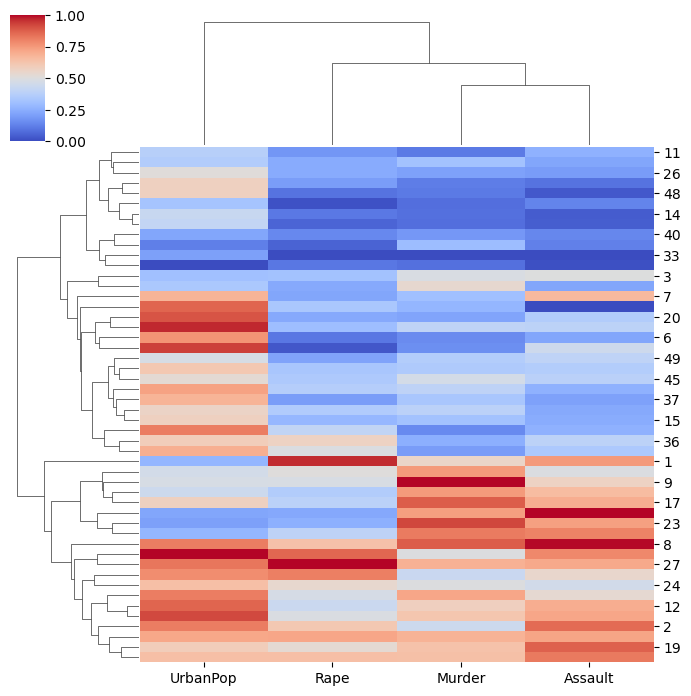

In [16]:
sn.clustermap(crime_norm, cmap='coolwarm', figsize=(7, 7))

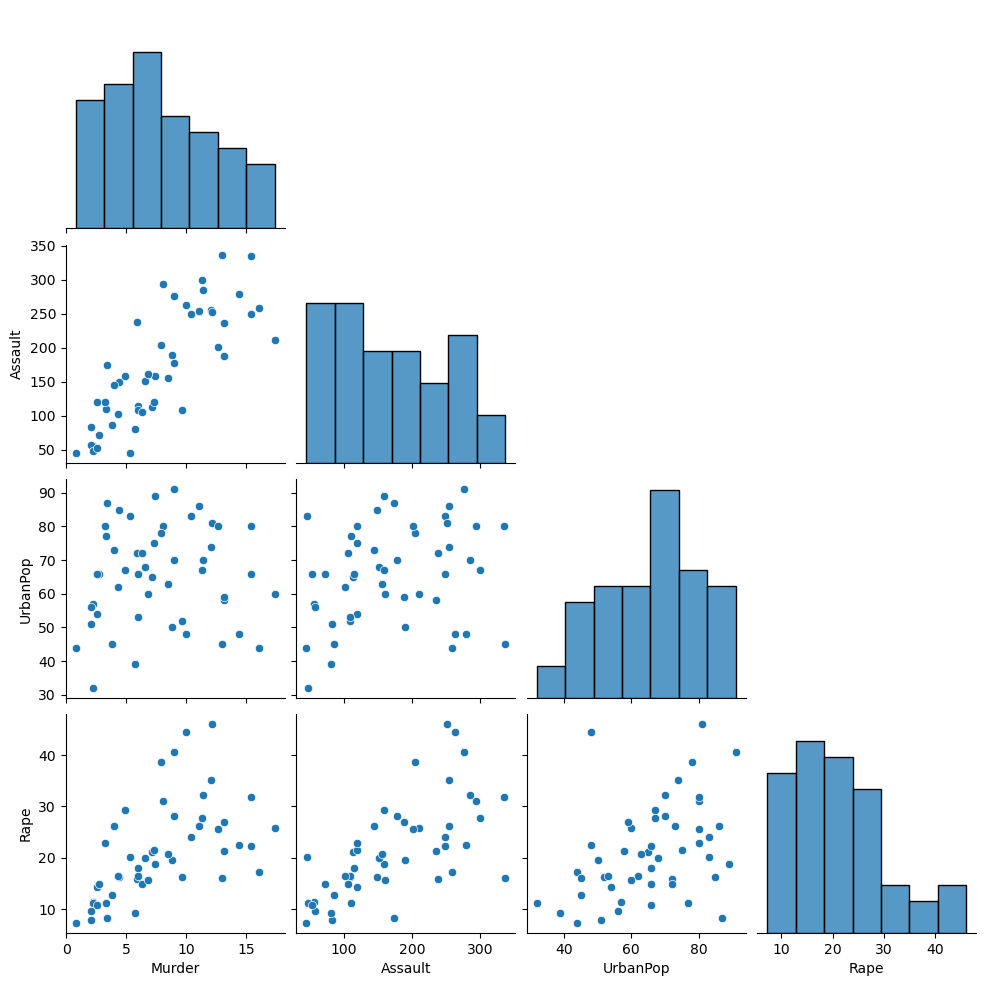

In [18]:
sn.pairplot(crime, corner=True)

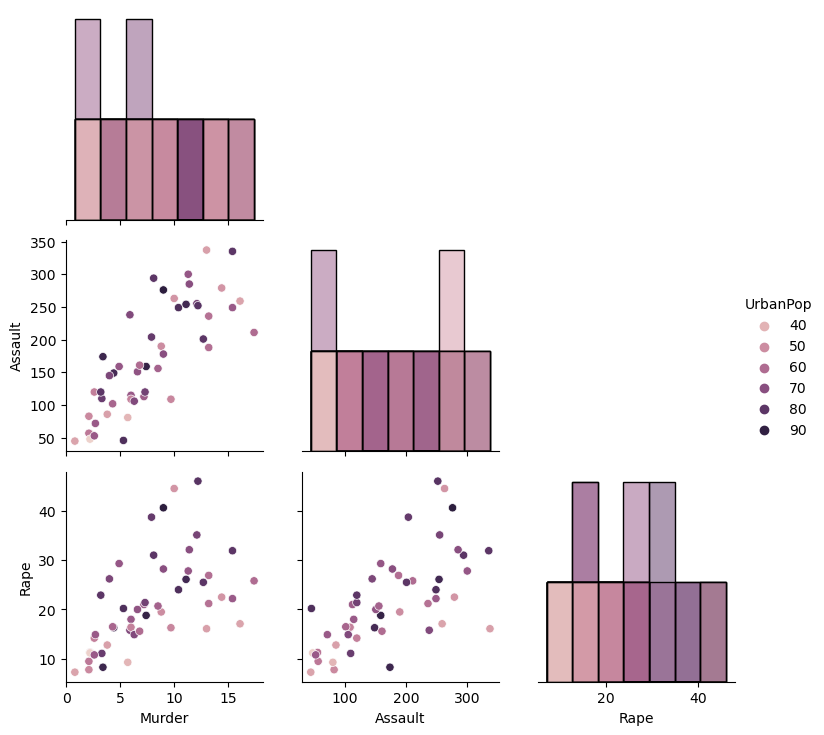

In [21]:
g = sn.PairGrid(crime, hue="UrbanPop",corner=True)
g.map_diag(sn.histplot)
g.map_offdiag(sn.scatterplot)
g.add_legend()